# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Analysis of source usage (android iPhone)

In this part we decided to analyze the main source from which the tweets were sent during campaign period and the presidency period. We decided to do it in order to see if there is a major change in the source usage from the results obtained in the article already cited: http://varianceexplained.org/r/trump-tweets/. This is because the article was published on the 9th of August 2016.
- First, we will create separate columns for tweets from iphone and tweets from android
- Then, we will group by month and we apply the count method to the new columns
- Finally, we will show a bar plot for the results.

Here, we retrieve the data for the two periods:

In [ ]:
# retrieving all data from Trump's tweets dataset
all_data, condensed, master = load_data()

# getting the condensed version for year 2016 and 2017
condensed_2016 = all_data["condensed_2016"]
condensed_2017 = all_data["condensed_2017"]

# creating a dataframe for campaign period
cond_US_campaign_2016 = select_time_interval(condensed_2016, 'created_at',
                                             np.datetime64('2016-02-01'), np.datetime64('2016-11-08'))

cond_US_campaign_2016 = cond_US_campaign_2016.sort_values('created_at')


# creating a dataframe for presidency period
cond_president_period_df = select_time_interval(condensed_2017, 'created_at',
                                                np.datetime64('2017-01-20'), np.datetime64('2017-11-05'))

cond_president_period_df = cond_president_period_df.sort_values('created_at')

- we start with the campaign period

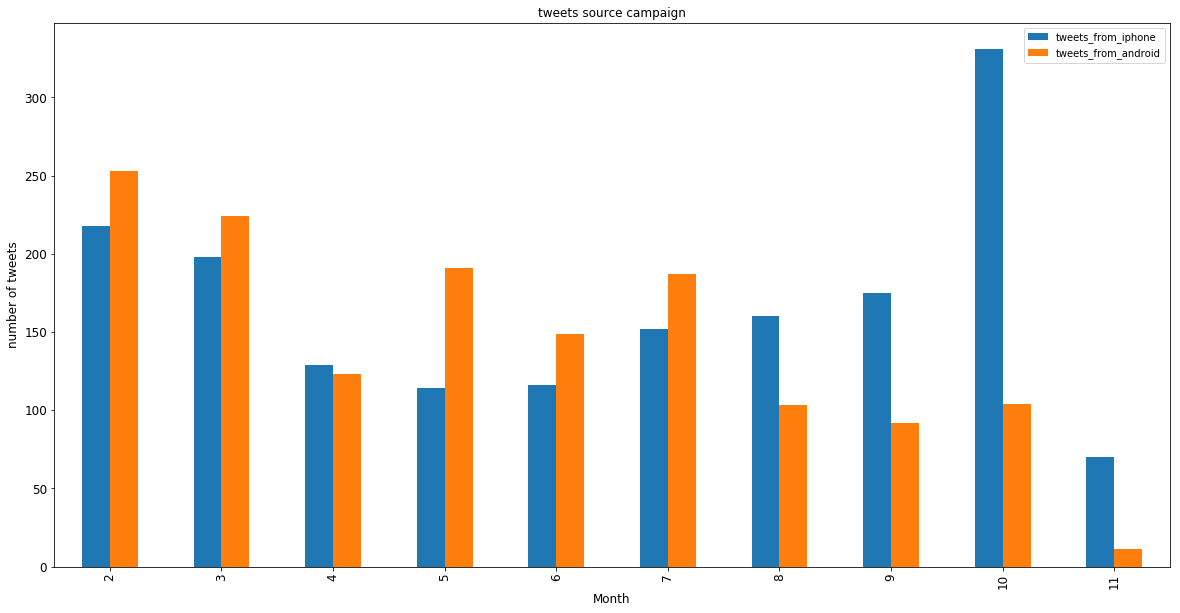

In [35]:
# tweets from Iphone source
tweets_iphone_campaign_df = cond_US_campaign_2016.loc[cond_US_campaign_2016['source']
                                                      == 'Twitter for iPhone', ['Month', 'source']]

tweets_iphone_campaign_df.rename(columns={'source': 'tweets_from_iphone'}, inplace=True)

# tweets from android source
tweets_android_campaign_df = cond_US_campaign_2016.loc[cond_US_campaign_2016['source']
                                                       == 'Twitter for Android', ['Month', 'source']]

tweets_android_campaign_df.rename(columns={'source': 'tweets_from_android'}, inplace=True)

# final dataframe with the two new columns
tweets_source_campaign_df = tweets_iphone_campaign_df.append(tweets_android_campaign_df)

# here we group by month and use the count method on the two columns
tweets_source_campaign_month = tweets_source_campaign_df.groupby('Month').agg({'tweets_from_iphone': 'count',
                                                                               'tweets_from_android': 'count'})
# reorder the dataframe by month
tweets_source_campaign_month.sort_index(inplace=True)

# creating a bar chart to visualize our results
barchart_tweets_source = tweets_source_campaign_month.plot(kind='bar', title="tweets source campaign",
                                                           legend=True, fontsize=12, figsize=(20, 10))

barchart_tweets_source.set_xlabel("Month", fontsize=12)
barchart_tweets_source.set_ylabel("number of tweets", fontsize=12)

plt.show()

Nothing in particular can be noticed, as this period was almost completely covered by the article.

- Now, we will do the same for the presidency period:

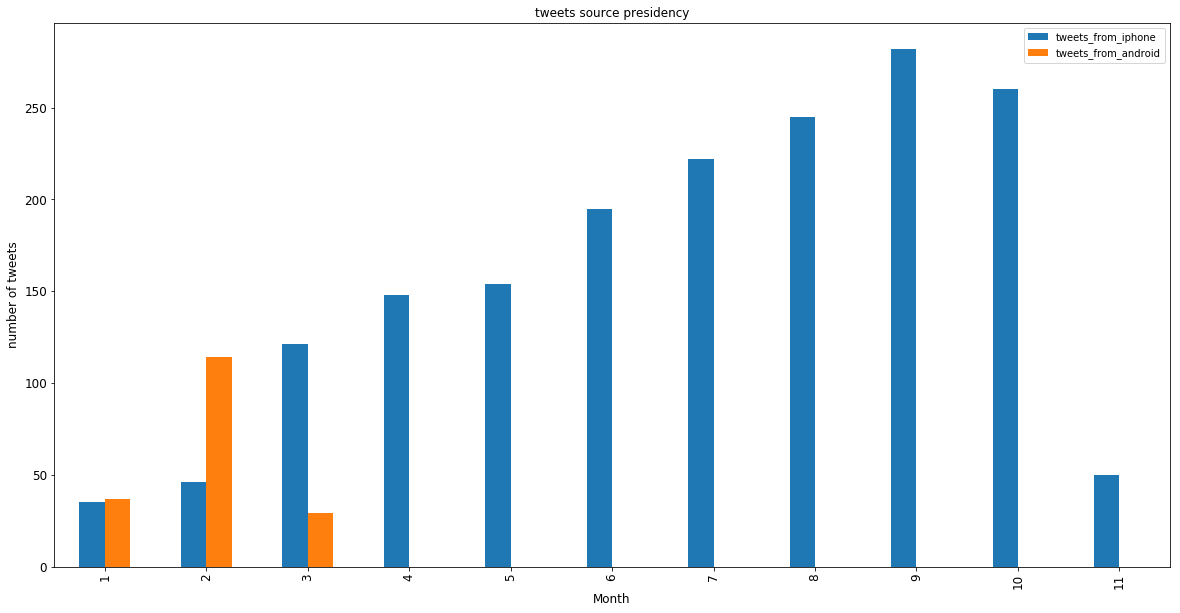

In [36]:
# tweets from Iphone source
tweets_iphone_presidency_df = cond_president_period_df.loc[cond_president_period_df['source']
                                                           == 'Twitter for iPhone', ['month', 'source']]

tweets_iphone_presidency_df.rename(columns={'source': 'tweets_from_iphone'}, inplace=True)

# tweets from android source
tweets_android_presidency_df = cond_president_period_df.loc[cond_president_period_df['source']
                                                           == 'Twitter for Android', ['month', 'source']]

tweets_android_presidency_df.rename(columns={'source': 'tweets_from_android'}, inplace=True)

# final dataframe with the two new columns
tweets_source_presidency_df = tweets_iphone_presidency_df.append(tweets_android_presidency_df)


# now we group by month and we count the number of tweets for the two columns
tweets_source_presidency_month = tweets_source_presidency_df.groupby('month').agg({'tweets_from_iphone': 'count',
                                                                                   'tweets_from_android': 'count'})
# we sort the dataframe by month
tweets_source_presidency_month.sort_index(inplace=True)

# we create a bar chart to visualize our results
barchart_tweets_source_pres = tweets_source_presidency_month.plot(kind='bar', title="tweets source presidency",
                                                                legend=True, fontsize=12, figsize=(20, 10))

barchart_tweets_source_pres.set_xlabel("Month", fontsize=12)
barchart_tweets_source_pres.set_ylabel("number of tweets", fontsize=12)

plt.show()

Surprisingly, it is clear that in March 2017, the president switched completely to iPhone. Obviously this fact cannot be reached by the analysis of the article, it was published the 9th of August 2016. 

# Fake news term usage analysis

For this task we decided to consider three different period of time in order to see when the term "fake news" arise. We took the campaign period, the president-elect period and the presidency period. First of all we create a dataframe for each of these periods. Below you can see the helpers function that we used:

In [2]:
def load_data():
    """
    Loading all the data in one dictionary and two lists: condensed and master and returning them.
    You can access the json file from the dictionary
    using the file name without the .json extension.
    E.g.: all_data["condensed_2009"]
    """

    trump_tweets = glob.glob("trump_tweets/*.json")

    all_data = {}
    condensed = []
    master = []

    for json_file in trump_tweets:

        file = pd.read_json(json_file)
        all_data[os.path.basename(json_file).replace(".json", "")] = file

        if "master" in os.path.basename(json_file):
            master.append(file)
        else:
            condensed.append(file)

    return all_data, condensed, master



def select_time_interval(df, date_column, start_datetime, end_datetime):
    """
    returns a dataframe selected by a specific period of time
    """
    return df[(df[date_column] >= start_datetime) & (df[date_column] <= end_datetime)]

- Here we create the three dataframes:

In [3]:
# retrieving all data from Trump's tweets dataset
all_data, condensed, master = load_data()

# getting the condensed version for year 2016 and 2017
condensed_2016 = all_data["condensed_2016"]
condensed_2017 = all_data["condensed_2017"]

# creating a dataframe for campaign period
cond_US_campaign_2016 = select_time_interval(condensed_2016, 'created_at',
                                             np.datetime64('2016-02-01'), np.datetime64('2016-11-08'))

cond_US_campaign_2016 = cond_US_campaign_2016.sort_values('created_at')


# creating a dataframe for president elect period
cond_pres_elect_df = select_time_interval(condensed_2016, 'created_at',
                                          np.datetime64('2016-11-09'), np.datetime64('2016-12-31'))

cond_pres_elect_df_2017 = select_time_interval(condensed_2017, 'created_at',
                                               np.datetime64('2017-01-01'), np.datetime64('2017-01-20'))

cond_pres_elect_df = cond_pres_elect_df.append(cond_pres_elect_df_2017)

cond_pres_elect_df = cond_pres_elect_df.sort_values('created_at')


# creating a dataframe for presidency period
cond_president_period_df = select_time_interval(condensed_2017, 'created_at',
                                                np.datetime64('2017-01-20'), np.datetime64('2017-11-05'))

cond_president_period_df = cond_president_period_df.sort_values('created_at')

### The campaign period

- Now we will search in each tweets for the term "fake news". We used a simple regex and we do not consider case sensitive. We create a new column of boolean values 'fake_news_used' in our dataframe using the 'contains' method. After this we create useful columns with Month, week/year and day values in order to make a groupby with them and see some interesting patterns in the usage of the term.

In [4]:
# creating the column with boolean values for the matches of the regex:
cond_US_campaign_2016['fake_news_used'] = cond_US_campaign_2016['text'].str.contains('fake news|fakenews', case=False)

# creating the columns 'Month', 'week/year' and 'Date'
cond_US_campaign_2016['Month'] = cond_US_campaign_2016['created_at'].dt.month
cond_US_campaign_2016['week/year'] = cond_US_campaign_2016['created_at'].apply(lambda x: "%d/%d" % (x.week, x.year))
cond_US_campaign_2016['Date'] = cond_US_campaign_2016['created_at'].dt.date


- Now first we count how many positive results we had:

In [5]:
cond_US_campaign_2016['fake_news_used'].sum()

0

As you can see, during his campaign period, the 'fake news' did not appear in any of his tweets. In order to be sure we search for the words 'fake' and 'news' separately and these are the results:

In [6]:
# search for the word fake
match_df = cond_US_campaign_2016.loc[:,['text']]
match_df['fake_usage'] = cond_US_campaign_2016['text'].str.contains('fake', case=False)
temp_df = match_df[match_df['fake_usage'] == True]

print(str(temp_df.text.values))
temp_df


[ '"@ddpick18: @realDonaldTrump This Texan will be voting Trump March 1st. Cruz is a fake Texan!"'
 '@elizabethforma Goofy Elizabeth Warren, sometimes referred to as Pocahontas because she faked the fact she is native American, is a lowlife!'
 '"@JimVitari:  @ABC @washingtonpost we know they\'re fake just like poles during primary. I\'m sure u will crush #CrookedHillary in general"'
 '"@brazosboys: Hillary read "sigh" off the Teleprompter, She\'s so fake she has to be told how to feel: https://t.co/ENXliW2m77 @FoxNews']


,text,fake_usage
3349,"""@ddpick18: @realDonaldTrump This Texan will b...",True
2228,"@elizabethforma Goofy Elizabeth Warren, someti...",True
1898,"""@JimVitari: @ABC @washingtonpost we know the...",True
1897,"""@brazosboys: Hillary read ""sigh"" off the Tele...",True


In [7]:
# search for the word 'news'
match_df = cond_US_campaign_2016.loc[:,['text']]
match_df['news_usage'] = cond_US_campaign_2016['text'].str.contains('news', case=False)
temp_df = match_df[match_df['news_usage'] == True]

# showing the results
temp_df.head()

,text,news_usage
3705,I will be interviewed on @greta at 7:00 P.M. E...,True
3601,"Dopey Mort Zuckerman, owner of the worthless @...",True
3600,"Worthless @NYDailyNews, which dopey Mort Zucke...",True
3599,"Like the worthless @NYDailyNews, looks like @p...",True
3591,There are no buyers for the worthless @NYDaily...,True


In [8]:
# number of positive matches:
temp_df.news_usage.sum()

147

For the 'news' term we found mostly tweets with hashtags of media or other tweets that are related with 'fake news' term.
Therefore, we conlcude what we have said before, in the campaign period there is no sign of the 'fake news' term in his tweets. We can go ahead with the president-elect period.

### President elect period

- Here we repeat the same process that we have done for the campaign period:

In [9]:
# creating the column with boolean values for the matches of the regex:
cond_pres_elect_df['fake_news_used'] = cond_pres_elect_df['text'].str.contains('fake news|fakenews', case=False)

# creating the columns 'month', 'week/year' and 'date'
cond_pres_elect_df['month'] = cond_pres_elect_df['created_at'].dt.month
cond_pres_elect_df['week/year'] = cond_pres_elect_df['created_at'].apply(lambda x: "%d/%d" % (x.week, x.year))
cond_pres_elect_df['date'] = cond_pres_elect_df['created_at'].dt.date

# showing the number of positive matches:
cond_pres_elect_df['fake_news_used'].sum()

11

- We have few positive matches, let's continue with the analysis:
- first we display all the tweets:

In [10]:
match_df = cond_pres_elect_df.loc[cond_pres_elect_df['fake_news_used'] == True, ['date','text']]
match_df = match_df.sort_values('date')
from IPython.display import display
print(str(match_df.text.values))
match_df


[ 'Reports by @CNN that I will be working on The Apprentice during my Presidency, even part time, are ridiculous &amp; untrue - FAKE NEWS!'
 'FAKE NEWS - A TOTAL POLITICAL WITCH HUNT!'
 'RT @MichaelCohen212: I have never been to Prague in my life. #fakenews https://t.co/CMil9Rha3D'
 "'BuzzFeed Runs Unverifiable Trump-Russia Claims' #FakeNews \nhttps://t.co/d6daCFZHNh"
 'I win an election easily, a great "movement" is verified, and crooked opponents try to belittle our victory with FAKE NEWS. A sorry state!'
 'Intelligence agencies should never have allowed this fake news to "leak" into the public. One last shot at me.Are we living in Nazi Germany?'
 "We had a great News Conference at Trump Tower today. A couple of FAKE NEWS organizations were there but the people truly get what's going on"
 '.@CNN is in a total meltdown with their FAKE NEWS because their ratings are tanking since election and their credibility will soon be gone!'
 'Totally made up facts by sleazebag political operative

,date,text
91,2016-12-10,Reports by @CNN that I will be working on The ...
2123,2017-01-11,FAKE NEWS - A TOTAL POLITICAL WITCH HUNT!
2122,2017-01-11,RT @MichaelCohen212: I have never been to Prag...
2121,2017-01-11,'BuzzFeed Runs Unverifiable Trump-Russia Claim...
2118,2017-01-11,"I win an election easily, a great ""movement"" i..."
2117,2017-01-11,Intelligence agencies should never have allowe...
2116,2017-01-12,We had a great News Conference at Trump Tower ...
2112,2017-01-12,.@CNN is in a total meltdown with their FAKE N...
2108,2017-01-13,Totally made up facts by sleazebag political o...
2090,2017-01-16,"much worse - just look at Syria (red line), Cr..."


- We noticed that in this 11 tweets the fake news term was related mostly with CNN and Russia. Specially the rise of the term was due to release of a non-verified paper by Buzzfeed containing strong claims about Trump and Russia ties and possibility that Trump could be blackmailed by the Russian governement. He over reacted to this leak, attacking the intelligence agencies and trying to discredit the Media. For more information, here you have the story described by the New York Times: https://www.nytimes.com/2017/01/10/business/buzzfeed-donald-trump-russia.html


- Due to the small number of tweets with the 'fake news' term we can go ahead with the next period.

## Presidency period

Again, we prepare the dataframe creating the column for the match:

In [11]:
# creating the column with boolean values from the regex result:
cond_president_period_df['fake_news_used'] = cond_president_period_df['text'].str.contains('fake news|fakenews', case=False)

# showing the number of positive results:
cond_president_period_df['fake_news_used'].sum()


132

- Considered that we have a period of 10 month, we have an interesting number of postive matches, so we can start a deeper analysis conidering the months, the week/year and by date:

In [12]:
# adding month, date and week/year columns in order to make groupby operations
cond_president_period_df['month'] = cond_president_period_df['created_at'].dt.month
cond_president_period_df['date'] = cond_president_period_df['created_at'].dt.date
cond_president_period_df['week/year'] = cond_president_period_df['created_at'].apply(lambda x: "%d/%d" % (x.week, x.year))


### analysis by month

- For a first insight, we will groupby by Month columns and count the usage of the term per month, showing it with a bar plot:

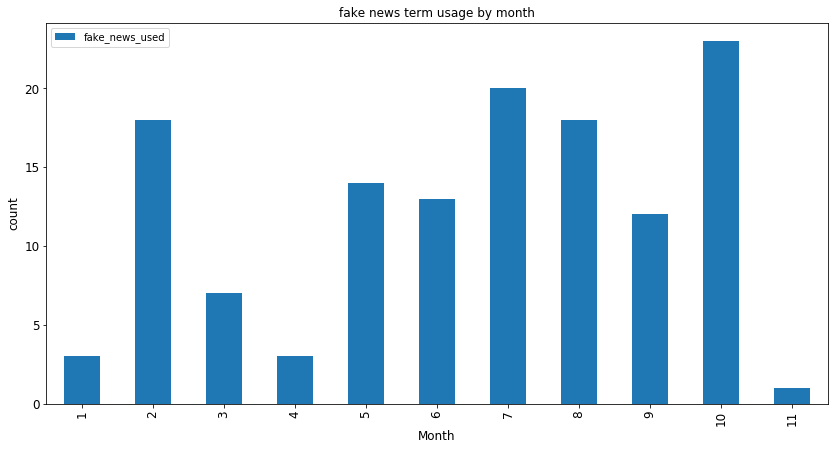

In [13]:
month_analysis_df = cond_president_period_df[['month', 'fake_news_used']]
month_analysis_df = month_analysis_df.groupby(['month']).sum()

bar_month_plot = month_analysis_df.plot(kind='bar', title="fake news term usage by month", legend=True, fontsize=12, figsize=(14, 7))
bar_month_plot.set_xlabel("Month", fontsize=12)
bar_month_plot.set_ylabel("count", fontsize=12)
plt.show()

- We reorder the dataset by the number of times he used the term and show again the plot:

In [14]:
month_analysis_df = month_analysis_df.sort_values('fake_news_used', ascending=False)

#showing the dataframe
month_analysis_df

,fake_news_used
month,
10,23.0
7,20.0
2,18.0
8,18.0
5,14.0
6,13.0
9,12.0
3,7.0
1,3.0


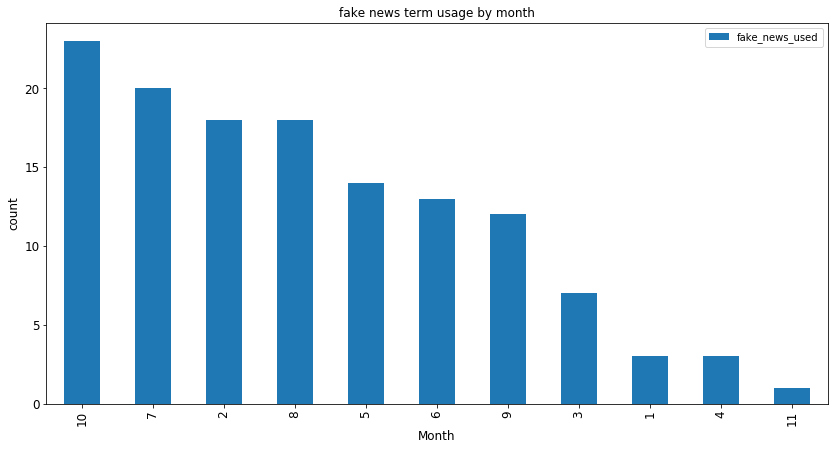

In [15]:
# showing the bar plot
bar_month_plot = month_analysis_df.plot(kind='bar', title="fake news term usage by month", legend=True, fontsize=12, figsize=(14, 7))
bar_month_plot.set_xlabel("Month", fontsize=12)
bar_month_plot.set_ylabel("count", fontsize=12)
plt.show()

- It is to be said that we have small values for january 2017 because the presidency period starts the 20th of january.
- dividing by month it is clear that we need to restrict the period of time of the groupby in order to see if we can obtain clear peak in the term usage.
- Month of october there was the scandal about the claims and comments of Tillerson about Trump (CONTINUE???)

In [16]:
#month_match_df = cond_president_period_df.loc[cond_president_period_df['fake_news_used'] == True, ['month', 'text']]
#print(str(month_match_df[month_match_df['month'] == 10].text.values))

In [17]:
## still have to add the analysis

### analysis by week/year

Let's refine our analysis considering the week/year:

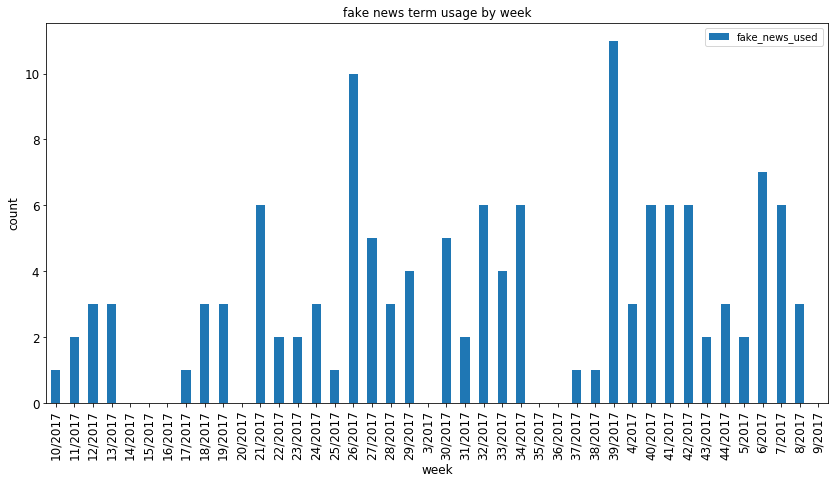

In [18]:
week_analysis_df = cond_president_period_df[['week/year', 'fake_news_used']]
week_analysis_df = week_analysis_df.groupby(['week/year']).sum()

bar_week_plot = week_analysis_df.plot(kind='bar', title="fake news term usage by week", legend=True, fontsize=12, figsize=(14, 7))
bar_week_plot.set_xlabel("week", fontsize=12)
bar_week_plot.set_ylabel("count", fontsize=12)
plt.show()

- We have two clear peaks: the 26th week of the year (from June 26, 2017 to July 2, 2017) and the 39th week of the year (from September 25, 2017 to October 1, 2017).


- let us see the tweets of those two weeks:

In [19]:
# printing the matched tweets in the 26th week
week_analysis_df = cond_president_period_df.loc[cond_president_period_df['fake_news_used'] == True, ['week/year', 'text']]
week_26 = week_analysis_df.loc[week_analysis_df['week/year'] == '26/2017', ['text']]

print(str(week_26.values))

[[ 'Wow, CNN had to retract big story on "Russia," with 3 employees forced to resign. What about all the other phony stories they do? FAKE NEWS!']
 [ 'Fake News CNN is looking at big management changes now that they got caught falsely pushing their phony Russian stories. Ratings way down!']
 [ 'So they caught Fake News CNN cold, but what about NBC, CBS &amp; ABC? What about the failing @nytimes &amp; @washingtonpost? They are all Fake News!']
 [ "The failing @nytimes writes false story after false story about me. They don't even call to verify the facts of a story. A Fake News Joke!"]
 [ 'Some of the Fake News Media likes to say that I am not totally engaged in healthcare. Wrong, I know the subject well &amp; want victory for U.S.']
 [ 'The #AmazonWashingtonPost, sometimes referred to as the guardian of Amazon not paying internet taxes (which they should) is FAKE NEWS!']
 [ 'Watched low rated @Morning_Joe for first time in long time. FAKE NEWS. He called me to stop a National Enquirer 

- Trump again over reacted about an article by CNN that was proposed as an investigation into a meeting between an associate of Donald Trump (Anthony Scaramucci) and the head of a Russian investment fund. The article was removed from the website after a day of the publication because it was written without following any check or standard. As result, three CNN employees resigned and Trump used this situation to strongly attack the media again. For more information: https://www.theguardian.com/media/2017/jun/27/three-cnn-journalists-resign-over-retracted-trump-russia-story

- now we consider the 39th week:

In [20]:
# printing the matched tweets in the 26th week
week_39 = week_analysis_df.loc[week_analysis_df['week/year'] == '39/2017', ['text']]

print(str(week_39.values))

[[ '.@CNN is #FakeNews. Just reported COS (John Kelly) was opposed to my stance on NFL players disrespecting FLAG, ANTHEM, COUNTRY. Total lie!']
 [ 'Facebook was always anti-Trump.The Networks were always anti-Trump hence,Fake News, @nytimes(apologized) &amp; @WaPo were anti-Trump. Collusion?']
 [ 'Fake News CNN and NBC are going out of their way to disparage our great First Responders as a way to "get Trump." Not fair to FR or effort!']
 [ "The Fake News Networks are working overtime in Puerto Rico doing their best to take the spirit away from our soldiers and first R's. Shame!"]
 [ 'Despite the Fake News Media in conjunction with the Dems, an amazing job is being done in Puerto Rico. Great people!']
 [ 'To the people of Puerto Rico:\nDo not believe the #FakeNews!\n#PRStrong🇵🇷']
 [ "@ricardorossello ......#FakeNews critics are working overtime, but we're getting great marks from the people that truly matter! \n#PRStrong🇵🇷"]
 [ 'Because of #FakeNews my people are not getting the credit

- the tweets are mostly dealing with the situation in Puerto Rico following the devastation caused by Hurricane Maria. Trump felt attacked becuase his administration was blamed of not taking adequate decisions in order to help Puerto Rico. He has come back to the attention of the media after he attacked the mayor of San Juan, Carmen Yulín Cruz (Cruz critized Trump administration about how they wer dealing the complex situation). Again, we can see this link between the usage of the term "fake news" after he is been under accuse or under stress situation; Trump over reacted and he tried to divert attention from the main problem by discrediting the media and by dividing the community. For more information see the following links:
- https://www.washingtonpost.com/news/the-fix/wp/2017/09/30/trump-doesnt-get-it-on-puerto-rico-he-just-proved-it-by-lashing-out-at-san-juans-mayor/?utm_term=.693061c95fe5
- http://edition.cnn.com/2017/10/01/politics/trump-tweets-puerto-rico/index.html

In [21]:
## still have to add the analysis

### analysis by date

We will again create a dataframe with the number of times he used the term in day, then we will sort the dataframe by the number of times he used the term, after this we will also show the results in a bar plot:
given the great number of dates, we decided to make a plot for each month with on x-axis the days of the month and on y-axis the number of time he used the term in that specific date.


- Here, we will group by date and then sort the dataframe in descending order:

In [22]:
day_analysis_df = cond_president_period_df[['date', 'fake_news_used']]

# computing the number of times he used the word by day
day_analysis_df = day_analysis_df.groupby(['date']).sum()

# sorting the dataframe
day_analysis_df = day_analysis_df.sort_values('fake_news_used', ascending=False)

day_analysis_df.head(10)

,fake_news_used
date,
2017-09-30,8.0
2017-05-28,6.0
2017-08-07,5.0
2017-06-27,3.0
2017-10-21,3.0
2017-07-01,3.0
2017-10-11,3.0
2017-10-05,3.0
2017-10-04,3.0


The first three entries will be deepen after we show the bar plot:
- First, we group by the month and the date and we obtain the number of times.
- Then, for each month, we show the bar plot.

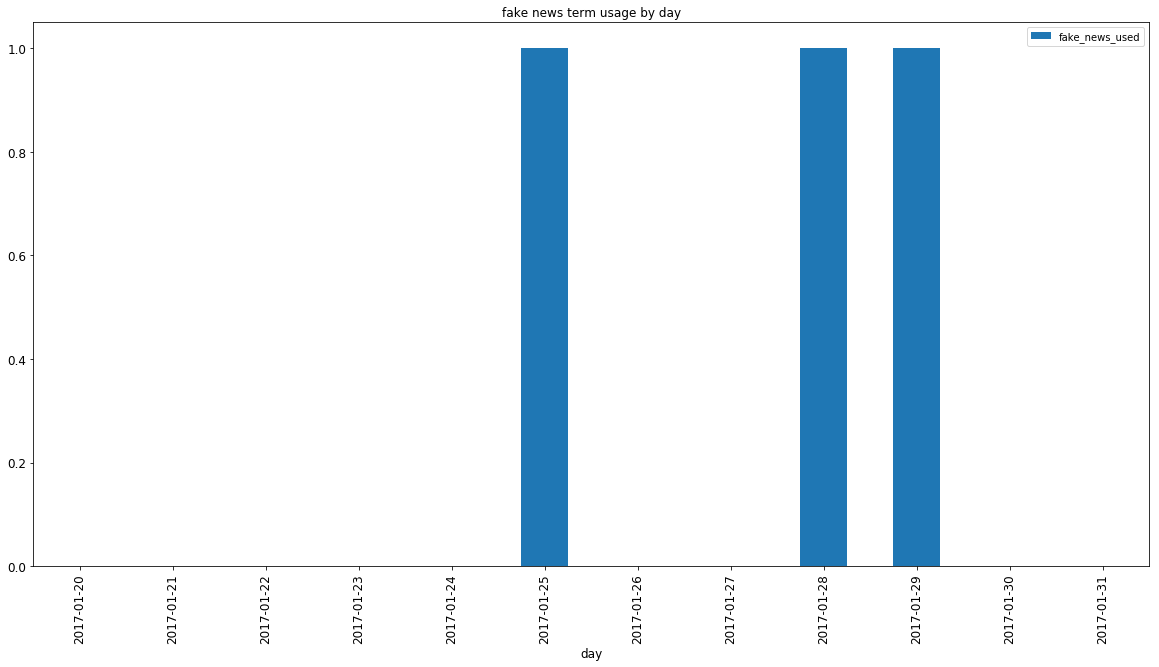

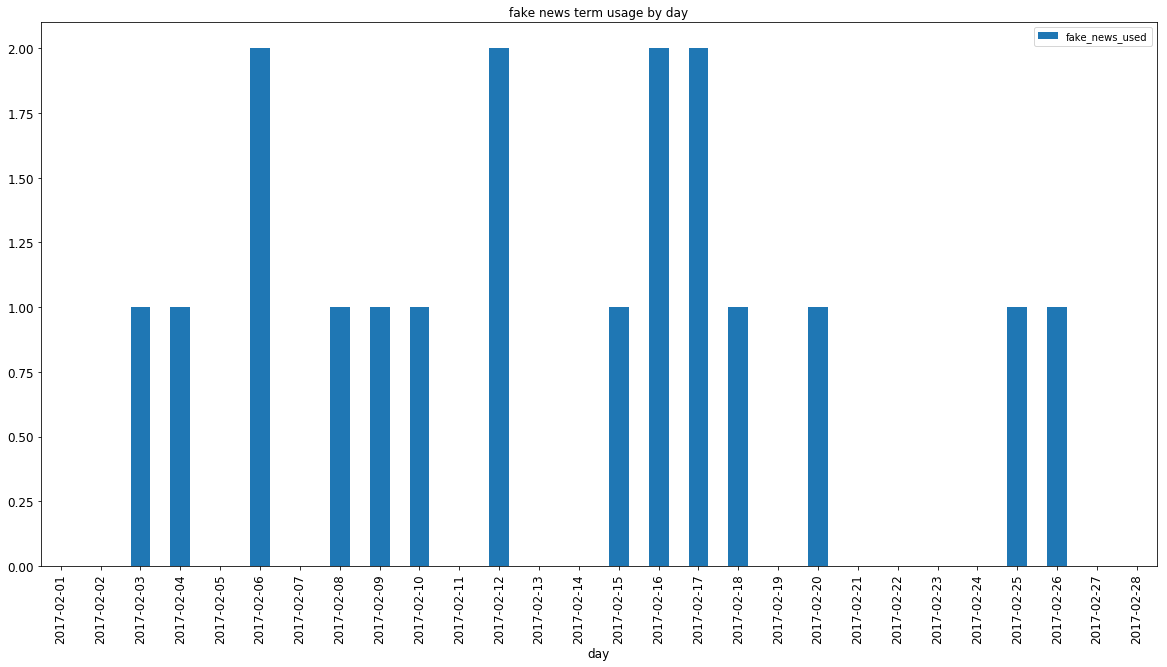

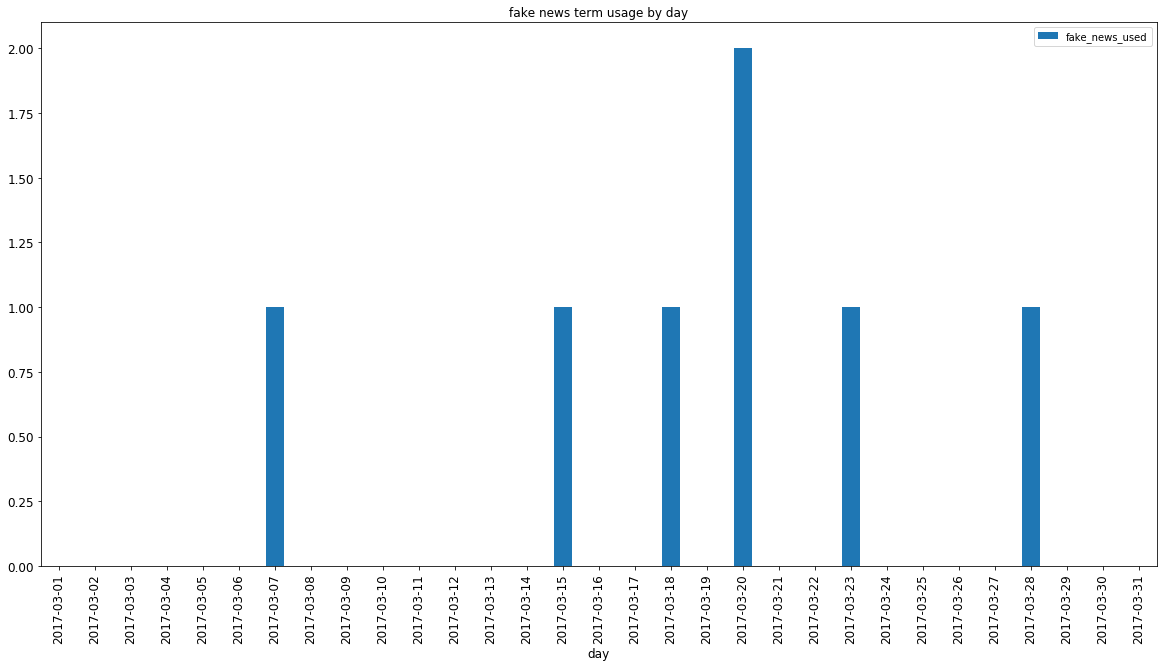

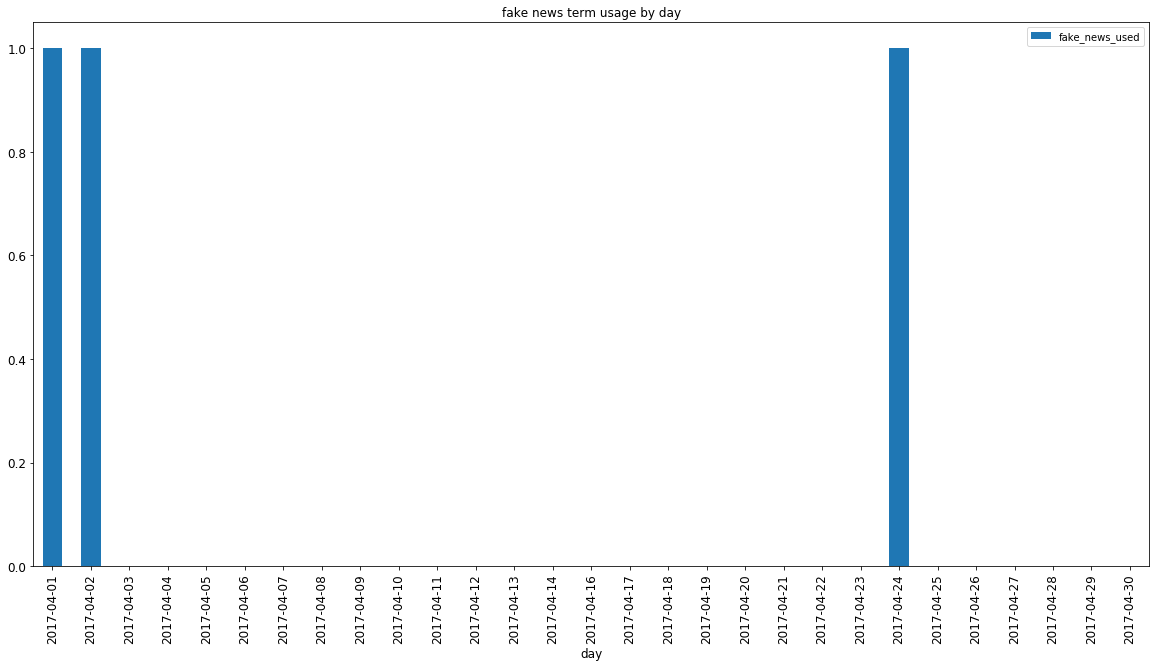

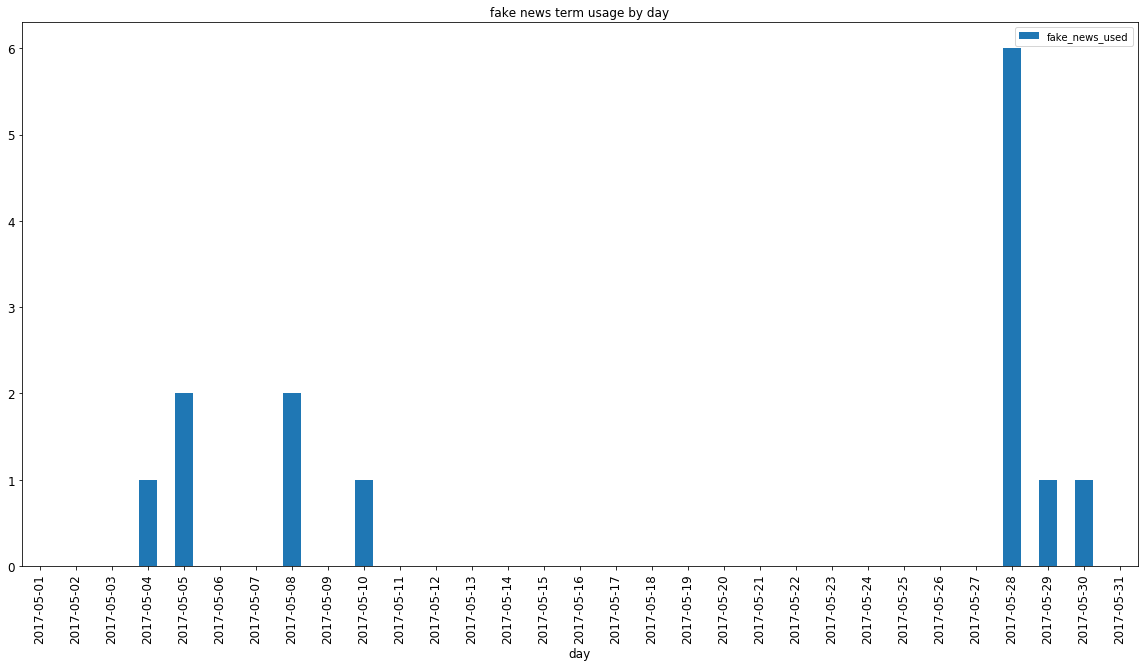

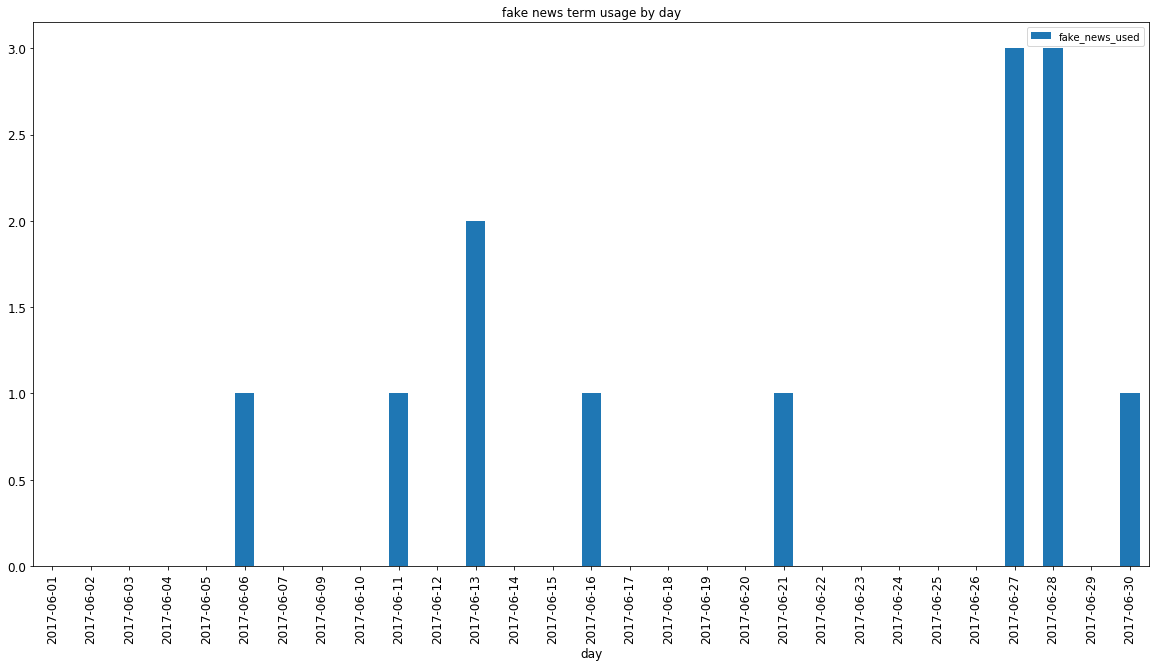

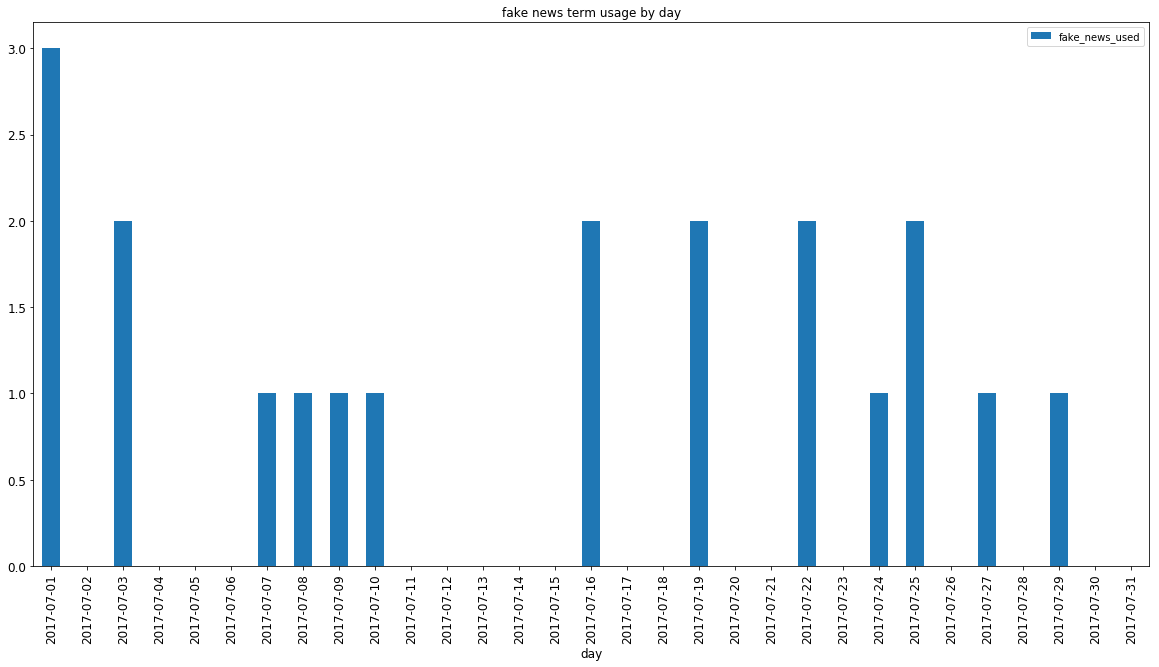

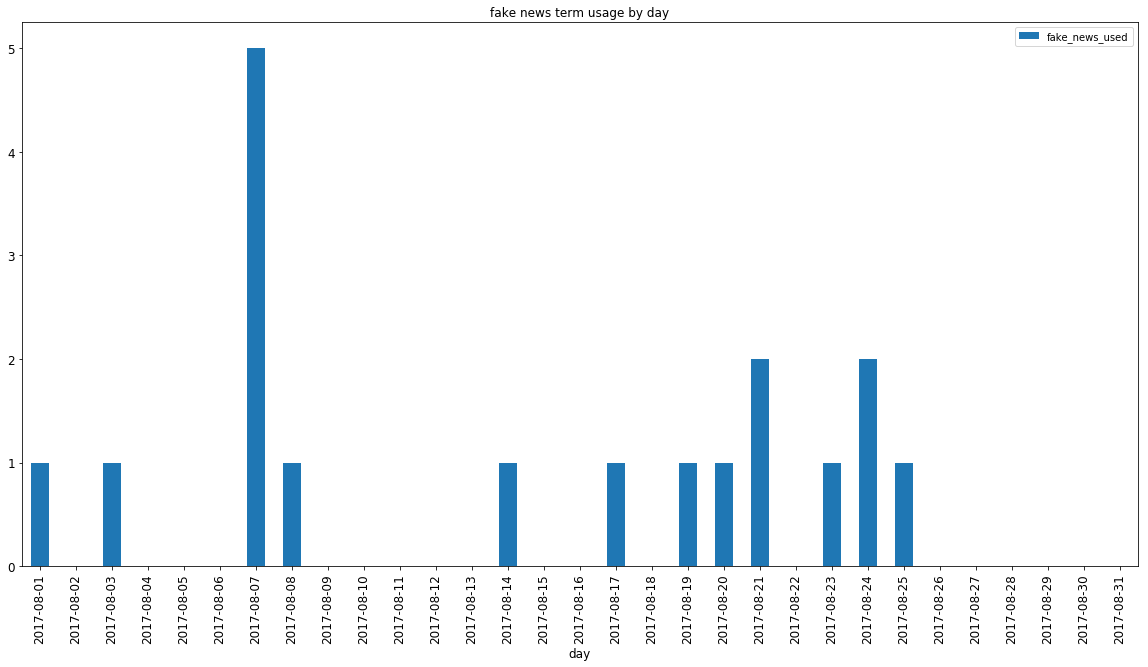

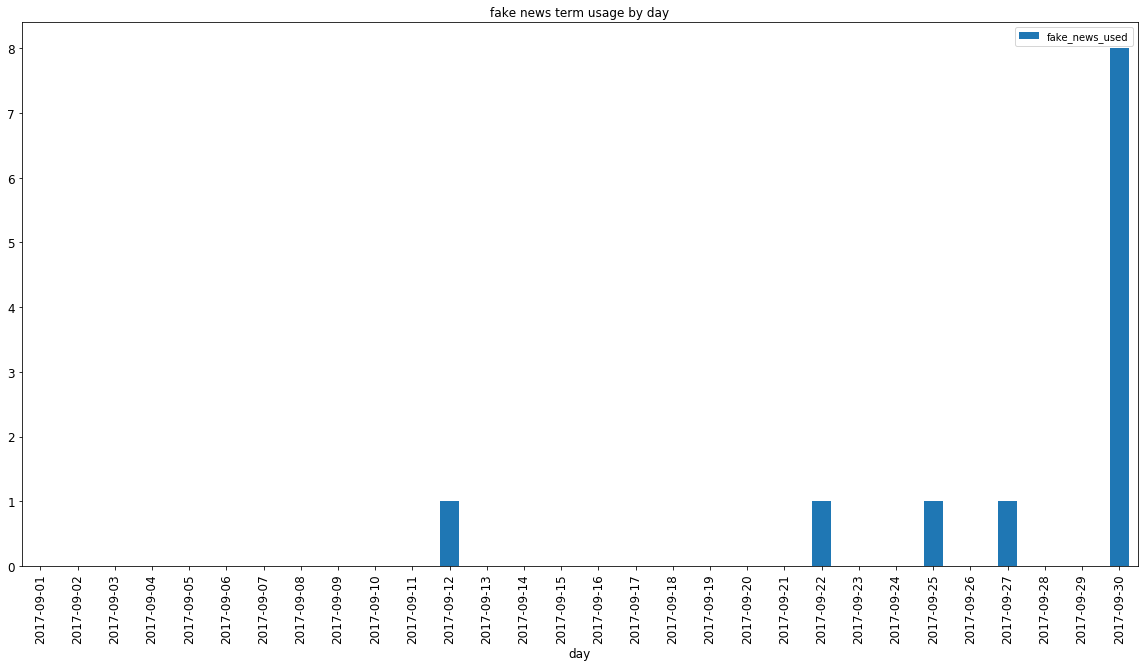

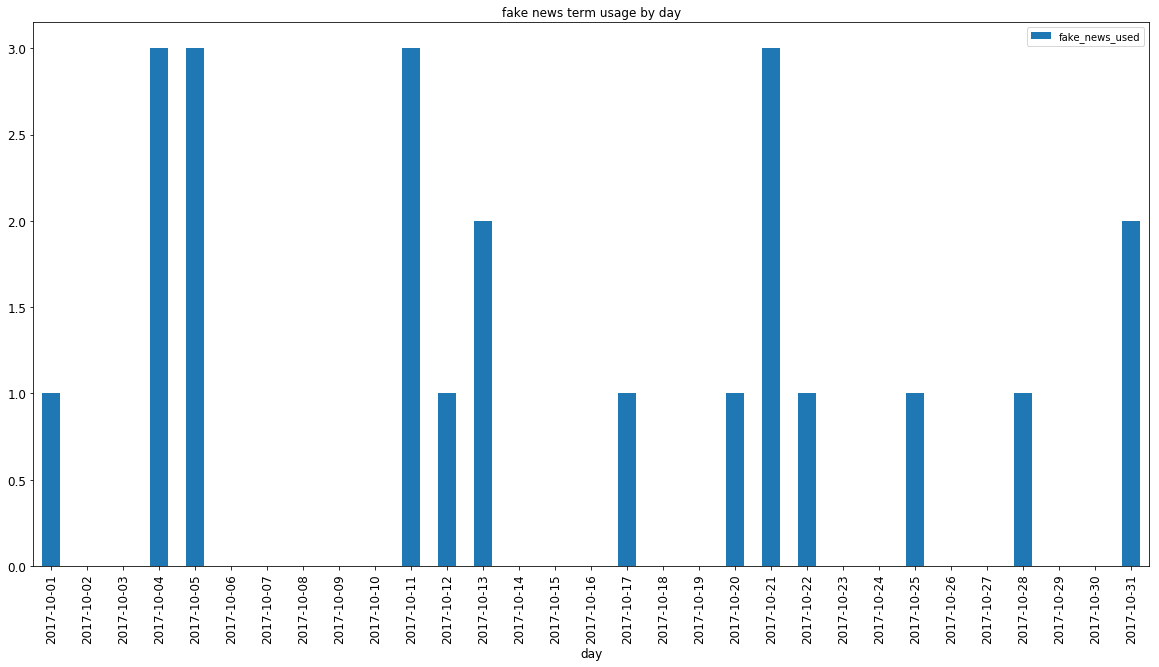

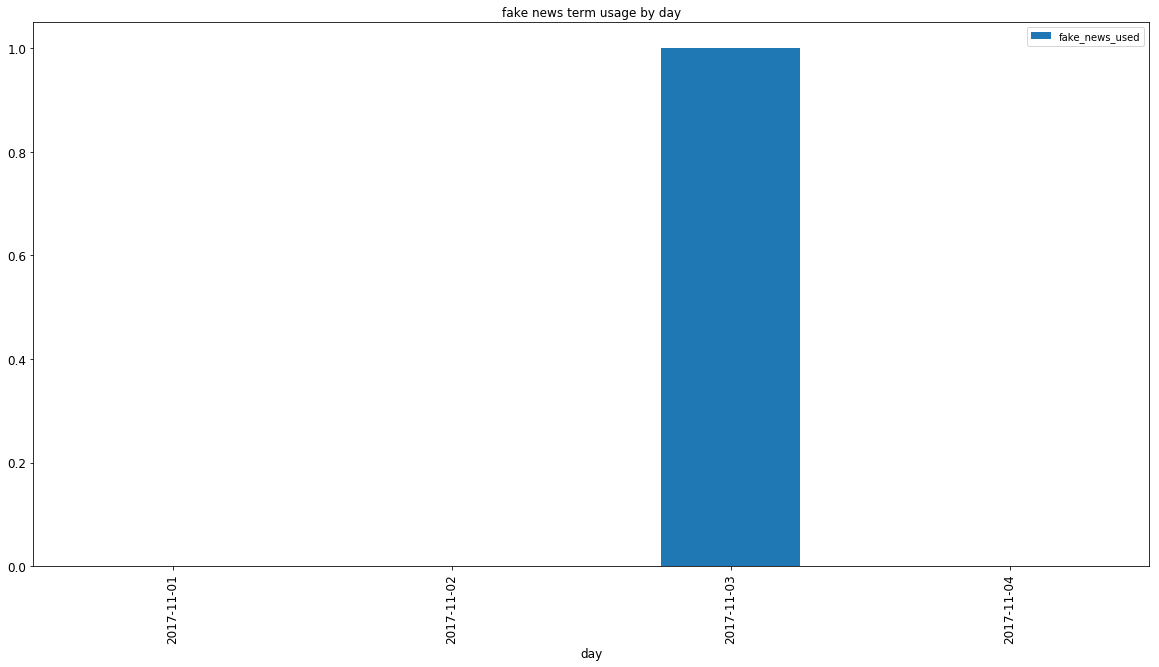

In [23]:
day_analysis_df = cond_president_period_df[['month','date', 'fake_news_used']]

# computing the number of times he used the word by day
day_analysis_df = day_analysis_df.groupby(['month','date']).sum()

months = day_analysis_df.index.get_level_values('month').unique()

# here, we create a dataframe for each month:
dataframe_month_list = []
for month in months:
    dataframe_month_list.append(day_analysis_df.iloc[day_analysis_df.index.get_level_values('month') == month])
    
# here, for each dataframe created we show the bar plot:
for df in dataframe_month_list:
    df.reset_index(level=0, drop=True, inplace= True)
    df.plot(kind='bar', title="fake news term usage by day",legend=True, fontsize=12,
            figsize=(20, 10)).set_xlabel("day", fontsize=12)

plt.show()




### Observations

from the sorting and the plots we decided to deepen the following three dates (2017-09-30, 2017-05-28 and 2017-08-07).
We will show the tweets and try to elaborate on them:

In [24]:
# creating the specific date for the matching mask
date = datetime.datetime.strptime('2017 05 28', '%Y %m %d').date()

# getting the matched tweets in the day 2017-05-28
day_analysis_df = cond_president_period_df.loc[cond_president_period_df['fake_news_used'] == True, ['date', 'text']]

date_2017_05_28 = day_analysis_df.loc[day_analysis_df['date'] == date, ['text']]
print(str(date_2017_05_28.text.values))
date_2017_05_28

[ 'It is my opinion that many of the leaks coming out of the White House are fabricated lies made up by the #FakeNews media.'
 "Whenever you see the words 'sources say' in the fake news media, and they don't mention names...."
 "....it is very possible that those sources don't exsist but are made up by fake news writers. #FakeNews is the enemy!"
 'Does anyone notice how the Montana Congressional race was such a big deal to Dems &amp; Fake News until the Republican won? V was poorly covered'
 "....it is very possible that those sources don't exist but are made up by fake news writers. #FakeNews is the enemy!"
 'Does anyone notice how the Montana Congressional race was such a big deal to Dems &amp; Fake News until the Republican won? V was poorly covered']


,text
1406,It is my opinion that many of the leaks coming...
1405,Whenever you see the words 'sources say' in th...
1404,....it is very possible that those sources don...
1403,Does anyone notice how the Montana Congression...
1402,....it is very possible that those sources don...
1401,Does anyone notice how the Montana Congression...


- As you can see we have three tweets repeated (we do not know right now if it is due to some repetition in our original dataset, further search will be done). 

- These tweets are linked again to another difficult situation for president Trump, namely, the scandal about his son in law Jared Kushner and his ties with the russian government. It was then reported that Jared Kushner, had asked the Russian ambassador to the US to create a secret channel with Russia using Russia’s communication systems. The communications were intercepted by US intelligence and then leaked to The Washington Post. President Trump dealt with this problem trying again to label a scandal as a fake news, again he tried to take the focus away from the main situation. For further information: http://www.independent.co.uk/news/world/americas/us-politics/donald-trump-washington-mounting-crisis-jared-kusher-backchannel-russia-latest-a7760481.html

- Now, we will procede with the date 2017-08-07:

In [25]:
# creating the specific date for the matching mask
date = datetime.datetime.strptime('2017 08 07', '%Y %m %d').date()

# getting the matched tweets in the day 2017-08-07
day_analysis_df = cond_president_period_df.loc[cond_president_period_df['fake_news_used'] == True, ['date', 'text']]

date_2017_08_07 = day_analysis_df.loc[day_analysis_df['date'] == date, ['text']]
print(str(date_2017_08_07.text.values))
date_2017_08_07

[ 'The Fake News refuses to report the success of the first 6 months: S.C., surging economy &amp; jobs,border &amp; military security,ISIS &amp; MS-13 etc.'
 'The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in Penn, Iowa, Ohio.......'
 '...and West Virginia. The fact is the Fake News Russian collusion story, record Stock Market, border security, military strength, jobs.....'
 'Hard to believe that with 24/7 #Fake News on CNN, ABC, NBC, CBS, NYTIMES &amp; WAPO, the Trump base is getting stronger!'
 "The Fake News Media will not talk about the importance of the United Nations Security Council's 15-0 vote in favor of sanctions on N. Korea!"]


,text
877,The Fake News refuses to report the success of...
874,The Trump base is far bigger &amp; stronger t...
873,...and West Virginia. The fact is the Fake New...
871,Hard to believe that with 24/7 #Fake News on C...
864,The Fake News Media will not talk about the im...


- President trump attacked again the media after Deputy Attorney General Rod J. Rosenstein told that if the special consuel for the Russian sabotage of USA 2016 election finds evidence of crimes, the consuel can investigate them. This fact create pressure for president Trump, who decided again to blame the media (this time accused of trying to weaken up the support for the president) in order to reassure his position and hide the main problem. 
- For more information: https://www.washingtonpost.com/blogs/plum-line/wp/2017/08/07/as-mueller-closes-in-trump-prepares-his-base-for-the-worst/?utm_term=.29b36bdeaae9


Finally, the tweets from the date 2017-09-30:

In [26]:
# creating the specific date for the matching mask
date = datetime.datetime.strptime('2017 09 30', '%Y %m %d').date()

# getting the matched tweets in the day 2017-09-30
day_analysis_df = cond_president_period_df.loc[cond_president_period_df['fake_news_used'] == True, ['date', 'text']]

date_2017_09_30 = day_analysis_df.loc[day_analysis_df['date'] == date, ['text']]
print(str(date_2017_09_30.text.values))
date_2017_09_30

[ 'Fake News CNN and NBC are going out of their way to disparage our great First Responders as a way to "get Trump." Not fair to FR or effort!'
 "The Fake News Networks are working overtime in Puerto Rico doing their best to take the spirit away from our soldiers and first R's. Shame!"
 'Despite the Fake News Media in conjunction with the Dems, an amazing job is being done in Puerto Rico. Great people!'
 'To the people of Puerto Rico:\nDo not believe the #FakeNews!\n#PRStrong🇵🇷'
 "@ricardorossello ......#FakeNews critics are working overtime, but we're getting great marks from the people that truly matter! \n#PRStrong🇵🇷"
 'Because of #FakeNews my people are not getting the credit they deserve for doing a great job. As seen here, they are ALL doing a GREAT JOB! https://t.co/1ltW2t3rwy'
 'In analyzing the Alabama Primary race, Fake News always fails to mention that the candidate I endorsed went up MANY points after Election!'
 'In analyzing the Alabama Primary race,FAKE NEWS always fails

,text
365,Fake News CNN and NBC are going out of their w...
363,The Fake News Networks are working overtime in...
362,Despite the Fake News Media in conjunction wit...
358,To the people of Puerto Rico:\nDo not believe ...
356,@ricardorossello ......#FakeNews critics are w...
351,Because of #FakeNews my people are not getting...
350,"In analyzing the Alabama Primary race, Fake Ne..."
349,"In analyzing the Alabama Primary race,FAKE NEW..."


As we could imagine by the week of this date, it came out that these tweets are the tweets referring to the Puerto Rico situation during the disaster of the hurricane Maria. See previous comments for remind.

### Last tasks proposed for this part before the Milestone 3

- Before Milestone 3 we want to refine and deepen these correlations between the term usage and the facts that happened in the same period, we will concetrate more on the week/year intervals.
- Currently, we are working on doing a sentiment analysis only on the tweets that contain the 'fake news' term, in order to see if we can get a clear mood of his tweets when they are about fake news.


# Washington Post dataset of debunked Trump's claims

By dealing with the issue of fake news, it is natural to ask how many times Trump has not been accurate in expressing facts and truths. As a result, during the preparatory research of our data, we tried to figure out if there was a way to have data in which Trump's tweets had been unveiled or corrected because they were unreliable. After several tests we found a washingtonPost dataset where there are Trump statements from different sources (interviews, declarations, tweets, etc.) and related to each of them there is the debunked version by the washingtonPost. Since we've decided to analyze only the source of the tweets, we've only taken the parts about tweets. Below we will explain the scraping part for data capture and the resulting merge with our dataset.

### data scraping

we begin by listing the link from the page from which we collected the data (the page is very interesting, with a good and clear date visualization). Link: https://www.washingtonpost.com/graphics/politics/trump-claims-database/?utm_term=.e3895bf3f60d

- First of all, as you can see on the page, the data is loaded dynamically and you need to select filters to only get data regarding the tweets (as well as loading the data list multiple times to view them all). For this reason, at the beginning we had thought of using Selenium to emulate clicks on the page, but it would be time-consuming since it's simply possible to select the filters, upload all the data and then download the obtained html. We have followed this second choice obviously. Once we got the html, we then explored the html DOM to understand the Tags we were interested in and finally we used BeautifulSoup. Specifically the data taken for each tweet is the date, the tweet text, the washington post version, and the tweet category.

- Here you can see the functions that we implemented for the scraping and the process:

In [27]:
from bs4 import BeautifulSoup
from dateutil.parser import parse as parse_date
import json
from itertools import chain


def parse_claim(c):
    '''
    for each claim we call this method that retrieves all the information 
    that we want, namely, the date, the tweet text, the washington Post
    analysis and the topic of the tweet.
    '''
    def get_topic():
        t = c.find('div', class_='details not-expanded')
        if not t:
            t = c.find('div', class_='details expanded')
        return t.find('p').text.split(': ')[-1]

    date = parse_date(c.find('div', class_='dateline').text)
    date = (date.day, date.month)

    return {
        'date': date,
        'text': c.find('div', class_='claim').text,
        'analysis': c.find('div', class_='analysis').text,
        'topic': get_topic()
    }

# creates a dictionary with key the value: element[field], for element in the list_ argument
def to_hash_collisions(list_, field):
    res = {}
    for element in list_:
        key = element[field]
        if key in res:
            res[key].append(element)
        else:
            res[key] = [element]
    return res


def most_similar(list_, orig):
    list_ = map(lambda text: set(text.split(' ')), list_)
    orig = set(orig.split(' '))
    closest_idx = -1
    closest_dst = -1
    for idx, bag in enumerate(list_):
        score = len(list(filter(lambda word: word in orig, bag)))
        if score > closest_dst:
            closest_dst = score
            closest_idx = idx
    return closest_idx



# Here we use BeautifulSoup on the saved html
soup = BeautifulSoup(open('fake_tweets.html', encoding="utf8"), 'html.parser')

# we create a list of all the tweets analyzed in the page, again, we know the tags and attributes becuase we inspect the DOM 
claims_list = soup.find(id='claims-list')\
                  .findAll('div', class_='claim-row')

# here we map the claim_list using on each element the 'parse_claim' method that we defined before
claims = map(parse_claim, claims_list)

# then we build a hash map indexed on (day,month) with collision lists of the data that we retrieved
claims = to_hash_collisions(claims, 'date')

# Read and prepare tweets from 2017
with open('trump_tweets/condensed_2017.json', 'r') as f:
    tweets17 = json.load(f)

# we modify the column 'created_at' inserting only the day and the month.
for t in tweets17:
    date = parse_date(t['created_at'])
    date = (date.day, date.month)
    t['created_at'] = date

# we Build a hash map indexed on (day,month) with collision lists for our dataset of tweets from 2017
tweets17 = to_hash_collisions(tweets17, 'created_at')


# Here we associate tweet id to each debunked tweet
for date, debunked_list in claims.items():
    if date not in tweets17:
        continue
        
    collision_list = tweets17[date]
    for deb in debunked_list:
        corresponding = None
        
        # if there is only one tweet in our Trump's tweet dataset for
        # that date we found the corresponding element
        
        if len(collision_list) == 1:
            corresponding = collision_list[0]
            
        # else, we call our method 'most_similar' with arguments the list of tweets of that date
        # and the tweet of that specific date from the debunked list.
        
        else:
            idx = most_similar([o['text'] for o in collision_list], deb['text'])
            corresponding = collision_list[idx]
            
        # finally we add the the tweet id of the matched tweet to our debunked element.
        deb['tweet_id'] = corresponding['id_str']

# Convert hashmap with collision lists back to list and sort by date
claims = sorted(chain.from_iterable(claims.values()), key=lambda o: o['date'])
claims = list(filter(lambda t: 'tweet_id' in t, claims))

# Dump everything to a nice json
with open('fact_checked.json', 'w') as f:
    json.dump(claims, f)


After this operation, we can add these data to our dataset of trump's tweet in 2017. We will merge the data by the tweet_id and than we will save the final dataframe in a .csv file in order to reload it for future use.

### Merge with our dataset

In [31]:
# loading fake news debunk files that we created from WASHINGTON_POST dataset
facts_checked = pd.read_json('fact_checked.json')

df_facts_checked = pd.DataFrame(facts_checked)

# merging our presidency dataframe with the facts_checked dataframe by the columns 'id_str' and 'tweet_id'
cond_president_period_df = cond_president_period_df.merge(df_facts_checked, left_on='id_str', right_on='tweet_id',
                                                          how='outer')

# saving our presidency period with fact checking in a csv file
cond_president_period_df.to_csv('presidency_period_with_fact_check')

# temp cleaned contains only the tweets with analysis, we create this only to see if the number of 
# tweets is the same from the fact_checked dataframe.
temp_cleaned = cond_president_period_df.drop('in_reply_to_user_id_str', axis=1)
temp_cleaned = temp_cleaned.dropna()

print("debunked tweets shape: " + str(df_facts_checked.shape))
print("merged tweets shape: " + str(temp_cleaned.shape))

debunked tweets shape: (308, 5)
merged tweets shape: (340, 21)


### Last step on this part before Milestone 3 

The last thing we are working on this part is to produce a word usage compared to tweeted labelled as debunked and show results, trying to see if there are differences or specific terms used in these tweets compared to all his other tweets of 2017. We decided to do so in the hope of finding results that demonstrate to the reader what terms Trump uses to create a distorted version of the facts.